In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as Ftorch

import torch.optim as optim

from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal', 
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
# load the data
csv_path = os.path.join("data", "data_single_stat.csv")
df = pd.read_csv(csv_path)

df

,Name,Size,branch-instructions,branch-misses in %,L3-cache-misses,L3-cache-miss-rate in %,L3-cache-references,cpu-cycles,total-instructions,IPC,cpu-clock,page-faults,L1-data-cache-loads,L1-instruction-cache-load-misses,LLC-load-misses
0,blackscholes,simlarge,9.641823e+08,2.158000,1.698940e+07,15.662867,1.084609e+08,9.733166e+09,6.443532e+09,0.662000,4162.194667,138634.533333,2.617347e+09,3.752222e+07,1.616560e+07
1,blackscholes,simmedium,5.279193e+08,3.108667,1.584257e+07,19.285467,8.214165e+07,5.739558e+09,2.970523e+09,0.516667,2462.880667,137586.866667,1.360070e+09,3.549749e+07,1.525457e+07
2,blackscholes,simsmall,4.195484e+08,3.678667,1.579114e+07,20.282867,7.783025e+07,4.821612e+09,2.111706e+09,0.438667,2074.144000,137307.266667,1.053408e+09,3.524576e+07,1.524999e+07
3,bodytrack,simlarge,1.656486e+09,1.826000,2.147122e+07,9.275000,2.314915e+08,1.690634e+10,1.478384e+10,0.874000,7219.955333,146251.266667,4.589001e+09,4.764042e+07,2.100791e+07
4,bodytrack,simmedium,7.547095e+08,2.546667,1.805030e+07,14.972133,1.205326e+08,8.161400e+09,5.560045e+09,0.682667,3501.200667,141846.000000,2.056889e+09,3.932278e+07,1.752447e+07
5,bodytrack,simsmall,5.154012e+08,3.153333,1.702425e+07,18.776000,9.067122e+07,5.803417e+09,3.019001e+09,0.520667,2494.912667,139965.333333,1.331443e+09,3.704318e+07,1.654071e+07
6,canneal,simlarge,2.266388e+09,4.778000,1.304227e+08,26.858000,4.856370e+08,4.810229e+10,1.046263e+10,0.217333,20469.224000,391204.133333,5.408152e+09,1.041286e+08,1.204224e+08
7,canneal,simmedium,1.279617e+09,4.669333,6.543459e+07,25.134267,2.603431e+08,2.376249e+10,5.907544e+09,0.248000,10122.764667,204843.333333,3.064633e+09,6.809959e+07,6.212890e+07
8,canneal,simsmall,8.010421e+08,4.439333,3.528358e+07,22.607000,1.560875e+08,1.231108e+10,3.668838e+09,0.298667,5257.149333,152650.800000,1.880088e+09,4.998015e+07,3.411725e+07
9,facesim,simlarge,2.628510e+09,3.296000,5.474997e+07,10.547067,5.189628e+08,3.231001e+10,3.040765e+10,0.943333,13784.516667,255822.466667,1.391288e+10,1.134689e+08,5.333007e+07


In [3]:
# load the data
csv_path = os.path.join("data", "data_amdahlspace.csv")
df_amd = pd.read_csv(csv_path)

df_amd

,Name,Size,F,Lambda,ThreadOpt
0,blackscholes,simlarge,0.148831,0.000746,32
1,blackscholes,simmedium,0.167602,0.000969,28
2,blackscholes,simsmall,0.206718,0.000667,32
3,bodytrack,simlarge,0.129021,0.000743,32
4,bodytrack,simmedium,0.115162,0.006090,12
5,bodytrack,simsmall,0.289035,0.002678,16
6,canneal,simlarge,0.657276,0.000337,28
7,canneal,simmedium,0.596754,0.000888,20
8,canneal,simsmall,0.664795,0.000323,28
9,facesim,simlarge,0.394352,0.009102,8


In [4]:
sql = """
SELECT df.*, df_amd.F, df_amd.Lambda, df_amd.ThreadOpt
FROM df
LEFT JOIN df_amd
ON df.Name=df_amd.Name AND df.Size=df_amd.Size
"""

df_ = pysqldf(sql).dropna()
dfname = df_[['Name', 'Size']]
df_

,Name,Size,branch-instructions,branch-misses in %,L3-cache-misses,L3-cache-miss-rate in %,L3-cache-references,cpu-cycles,total-instructions,IPC,cpu-clock,page-faults,L1-data-cache-loads,L1-instruction-cache-load-misses,LLC-load-misses,F,Lambda,ThreadOpt
0,blackscholes,simlarge,9.641823e+08,2.158000,1.698940e+07,15.662867,1.084609e+08,9.733166e+09,6.443532e+09,0.662000,4162.194667,138634.533333,2.617347e+09,3.752222e+07,1.616560e+07,0.148831,0.000746,32.0
1,blackscholes,simmedium,5.279193e+08,3.108667,1.584257e+07,19.285467,8.214165e+07,5.739558e+09,2.970523e+09,0.516667,2462.880667,137586.866667,1.360070e+09,3.549749e+07,1.525457e+07,0.167602,0.000969,28.0
2,blackscholes,simsmall,4.195484e+08,3.678667,1.579114e+07,20.282867,7.783025e+07,4.821612e+09,2.111706e+09,0.438667,2074.144000,137307.266667,1.053408e+09,3.524576e+07,1.524999e+07,0.206718,0.000667,32.0
3,bodytrack,simlarge,1.656486e+09,1.826000,2.147122e+07,9.275000,2.314915e+08,1.690634e+10,1.478384e+10,0.874000,7219.955333,146251.266667,4.589001e+09,4.764042e+07,2.100791e+07,0.129021,0.000743,32.0
4,bodytrack,simmedium,7.547095e+08,2.546667,1.805030e+07,14.972133,1.205326e+08,8.161400e+09,5.560045e+09,0.682667,3501.200667,141846.000000,2.056889e+09,3.932278e+07,1.752447e+07,0.115162,0.006090,12.0
5,bodytrack,simsmall,5.154012e+08,3.153333,1.702425e+07,18.776000,9.067122e+07,5.803417e+09,3.019001e+09,0.520667,2494.912667,139965.333333,1.331443e+09,3.704318e+07,1.654071e+07,0.289035,0.002678,16.0
6,canneal,simlarge,2.266388e+09,4.778000,1.304227e+08,26.858000,4.856370e+08,4.810229e+10,1.046263e+10,0.217333,20469.224000,391204.133333,5.408152e+09,1.041286e+08,1.204224e+08,0.657276,0.000337,28.0
7,canneal,simmedium,1.279617e+09,4.669333,6.543459e+07,25.134267,2.603431e+08,2.376249e+10,5.907544e+09,0.248000,10122.764667,204843.333333,3.064633e+09,6.809959e+07,6.212890e+07,0.596754,0.000888,20.0
8,canneal,simsmall,8.010421e+08,4.439333,3.528358e+07,22.607000,1.560875e+08,1.231108e+10,3.668838e+09,0.298667,5257.149333,152650.800000,1.880088e+09,4.998015e+07,3.411725e+07,0.664795,0.000323,28.0
9,facesim,simlarge,2.628510e+09,3.296000,5.474997e+07,10.547067,5.189628e+08,3.231001e+10,3.040765e+10,0.943333,13784.516667,255822.466667,1.391288e+10,1.134689e+08,5.333007e+07,0.394352,0.009102,8.0


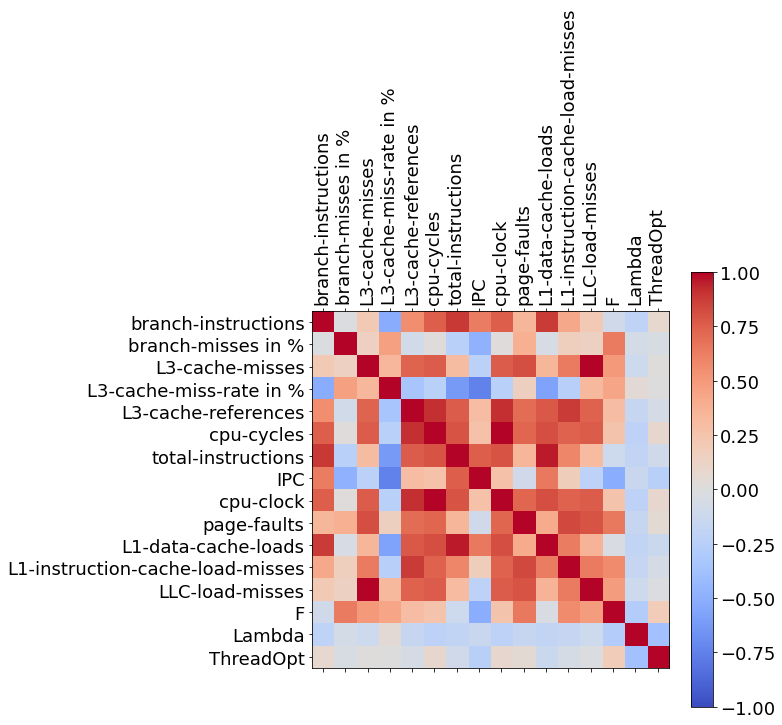

,F,Lambda
F,1.000000,-0.334701
branch-misses in %,0.651966,-0.156239
page-faults,0.611624,-0.096068
L3-cache-miss-rate in %,0.366838,-0.083077
L1-instruction-cache-load-misses,0.347692,-0.254701
L3-cache-misses,0.297778,0.068034
LLC-load-misses,0.295726,0.059829
ThreadOpt,0.131590,-0.963837
L3-cache-references,0.063932,0.000342
cpu-cycles,0.046838,-0.126154


In [5]:
# Correlation plot to show the interrelation between conditional variables and Exe-time 
plt.rcParams['figure.figsize'] = [8, 8]

df_vis = df_.drop(['Name', 'Size'], axis=1)

corr = df_vis.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_vis.columns))
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_vis.columns)
ax.set_yticklabels(df_vis.columns)

plt.show()

corrrelation = df_vis.corr(method="spearman");
corrrelation[['F', 'Lambda']].sort_values('F', ascending=False)

In [6]:
# normalize
def leave_one_out(tgt_idx=0):
    X = df_[
        [
            'branch-misses in %',
            'page-faults', 
            'L3-cache-miss-rate in %',
            'L1-instruction-cache-load-misses', 
            'total-instructions', 
            'IPC'
        ]
    ].to_numpy()
    

    y = df_[['F', 'Lambda', 'ThreadOpt']].to_numpy()

    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    Xlegend = dfname.to_numpy()

    X_mean, X_std = torch.mean(X, dim=0), torch.std(X, dim=0)
    X = (X - X_mean) / X_std
    X = X.float()


    # shuffle
#     idx = torch.randperm(X.size()[0])
    train_idx = [i for i in range(X.size()[0]) if not i == tgt_idx]
    test_idx = [tgt_idx]

    # split train/test
    X_train, X_test = X[train_idx], X[test_idx]
    lgd_train, lgd_test = Xlegend[train_idx], Xlegend[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    return X_train, X_test, y_train, y_test, lgd_train, lgd_test

X_train, X_test, y_train, y_test, lgd_train, lgd_test = leave_one_out(tgt_idx=25)

print(X_train.size(), X_test.size())
print(y_train.size(), y_test.size())

torch.Size([25, 6]) torch.Size([1, 6])
torch.Size([25, 3]) torch.Size([1, 3])


In [7]:
def opt_p(F, lmd):
    ret = np.sqrt((1 - F) / (lmd + 1e-4))
    return np.clip(ret, a_min=1.0, a_max=32)

class ANet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = Ftorch.relu(self.fc1(x))
        x = Ftorch.relu(self.fc2(x))
        x = self.fc3(x)
        
        F = torch.sigmoid(x[:, 0])
        lmd = torch.exp(x[:, 1])
        opt_p = torch.sqrt((1 - F)/ (lmd + 1e-4))
        
        return F, lmd, opt_p

In [8]:
def train_model_ANet(verbose=True):
    net = ANet()
    criterion = nn.L1Loss()
    optimizer = optim.Adam(net.parameters(), lr=0.01, betas=(0.9, 0.999))


    for epoch in range(2000):  # loop over the dataset multiple times

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        F, lmd, opt_p = net(X_train)

        loss_F = criterion(F, y_train[:, 0])
        loss_lmd = criterion(lmd, y_train[:, 1])
        loss_p = criterion(opt_p, y_train[:, 2])

        loss = loss_F + loss_lmd * 0.25 + loss_p * 0.2
        loss.backward()
        optimizer.step()

        if epoch % 100 == 99:
            F, lmd, opt_p = net(X_test)
            opt_est = torch.clip(opt_p, 1, 32)
            opt_est = torch.round(opt_est.detach())
            opt_real = y_test[:, 2]

            loss_test_opt = criterion(opt_real, opt_est)
            loss_test_F = criterion(F, y_test[:, 0])
            loss_test_lmd = criterion(lmd, y_test[:, 1])
            
            if verbose:
                print('[%d] loss_train_F: %.3f loss_test_F: %.3f' % (epoch + 1, loss_F, loss_test_F))
                print('[%d] loss_train_lmd: %.3f loss_test_lmd: %.3f' % (epoch + 1, loss_lmd, loss_test_lmd))
                print('[%d] loss_train_opt: %.3f, loss_opt_test: %.3f' % (epoch + 1, loss_p, loss_test_opt))
    if verbose:
        print('Finished Training')
    
    
    F, lmd, opt_p = net(X_test)
    return loss_test_F.detach(), loss_test_lmd.detach(), loss_test_opt.detach(), F.detach(), lmd.detach()

exp_num = 26

loss_Fs = []
loss_lmds = []
loss_opts = []


legend2ad = {}

Fs = []
lmds = []


for i in range(exp_num):
    
    X_train, X_test, y_train, y_test, lgd_train, lgd_test = leave_one_out(tgt_idx=i)
    loss_test_F, loss_test_lmd, loss_test_opt, F, lmd = train_model_ANet(False)
    
    loss_Fs.append(float(loss_test_F))
    loss_lmds.append(float(loss_test_lmd))
    loss_opts.append(float(loss_test_opt))
    
    legend2ad[(lgd_test[0][0], lgd_test[0][1])] = (F[0], lmd[0])
    Fs.append(float(F[0]))
    lmds.append(float(lmd[0]))
    
    print(lgd_test[0])
    print('loss_test_F: %.3f' % (loss_test_F))
    print('loss_test_lmd: %.3f' % (loss_test_lmd))
    print('loss_opt: %.3f' % (loss_test_opt))

print('')
print('loss_test_F avg: %.3f' % (np.mean(loss_Fs)))
print('loss_test_lmd avg: %.3f' % (np.mean(loss_lmds)))
print('loss_opt avg: %.3f' % (np.mean(loss_opts)))

['blackscholes' 'simlarge']
loss_test_F: 0.068
loss_test_lmd: 0.004
loss_opt: 19.000
['blackscholes' 'simmedium']
loss_test_F: 0.096
loss_test_lmd: 0.000
loss_opt: 6.000
['blackscholes' 'simsmall']
loss_test_F: 0.237
loss_test_lmd: 0.001
loss_opt: 11.000
['bodytrack' 'simlarge']
loss_test_F: 0.040
loss_test_lmd: 0.000
loss_opt: 4.000
['bodytrack' 'simmedium']
loss_test_F: 0.050
loss_test_lmd: 0.002
loss_opt: 1.000
['bodytrack' 'simsmall']
loss_test_F: 0.171
loss_test_lmd: 0.000
loss_opt: 3.000
['canneal' 'simlarge']
loss_test_F: 0.262
loss_test_lmd: 0.000
loss_opt: 4.000
['canneal' 'simmedium']
loss_test_F: 0.179
loss_test_lmd: 0.000
loss_opt: 2.000
['canneal' 'simsmall']
loss_test_F: 0.295
loss_test_lmd: 0.000
loss_opt: 0.000
['facesim' 'simlarge']
loss_test_F: 0.000
loss_test_lmd: 0.002
loss_opt: 1.000
['facesim' 'simmedium']
loss_test_F: 0.019
loss_test_lmd: 0.001
loss_opt: 0.000
['facesim' 'simsmall']
loss_test_F: 0.002
loss_test_lmd: 0.004
loss_opt: 1.000
['fluidanimate' 'simlarge

In [9]:
df_spdup = pd.read_csv(os.path.join("data", "data_speedup.csv"))
df_spdup

,Name,Size,Thread,Exec Time,Speed Up
0,blackscholes,simlarge,1,2.236800,1.000000
1,blackscholes,simlarge,2,1.272300,1.758076
2,blackscholes,simlarge,3,1.041300,2.259268
3,blackscholes,simlarge,4,0.810300,2.760459
4,blackscholes,simlarge,5,0.751875,3.040167
...,...,...,...,...,...
827,vips,simsmall,28,0.403600,3.308226
828,vips,simsmall,29,0.408500,3.269922
829,vips,simsmall,30,0.413400,3.231618
830,vips,simsmall,31,0.418300,3.193314


In [10]:
def amdahl_plus(F, lmd, p):
    # 1e-6 for numerical stability
    return 1 / (F + (1 - F) * (1 / (p + 1e-6)) + (p - 1) * lmd)


data = []


for _, r in df_spdup.iterrows():
    name, size, thread, spd_gt = r['Name'], r['Size'], r['Thread'], r['Speed Up']
    F, lmd = legend2ad[(name, size)]
    spd_est = float(amdahl_plus(F, lmd, thread))
    
    data.append([name, size, thread, spd_gt, spd_est])

df_predgt = pd.DataFrame(data, columns=['Name', 'Size', 'Thread', 'SpeedupGt', 'SpeedupPred'])
df_predgt

,Name,Size,Thread,SpeedupGt,SpeedupPred
0,blackscholes,simlarge,1,1.000000,1.000001
1,blackscholes,simlarge,2,1.758076,1.631986
2,blackscholes,simlarge,3,2.259268,2.054730
3,blackscholes,simlarge,4,2.760459,2.347920
4,blackscholes,simlarge,5,3.040167,2.555885
...,...,...,...,...,...
827,vips,simsmall,28,3.308226,5.093068
828,vips,simsmall,29,3.269922,5.016661
829,vips,simsmall,30,3.231618,4.940609
830,vips,simsmall,31,3.193314,4.865160


In [11]:
tgts = [4, 8, 16, 32]

data = []

for tgt_thread in tgts:
    df_slct = df_predgt[df_predgt['Thread'] == tgt_thread]
    diff = (df_slct['SpeedupGt'] - df_slct['SpeedupPred']).to_numpy()
    mse_err = np.mean(np.abs(diff))
    err_std = np.std(np.abs(diff))
    
    data.append([tgt_thread, mse_err, err_std])

pd.DataFrame(data, columns=['Thread', "Mean Absolute Error", "Std. Abolute Error"])

,Thread,Mean Absolute Error,Std. Abolute Error
0,4,0.334290,0.269926
1,8,0.849231,0.668649
2,16,1.204899,1.100003
3,32,1.464550,1.165033


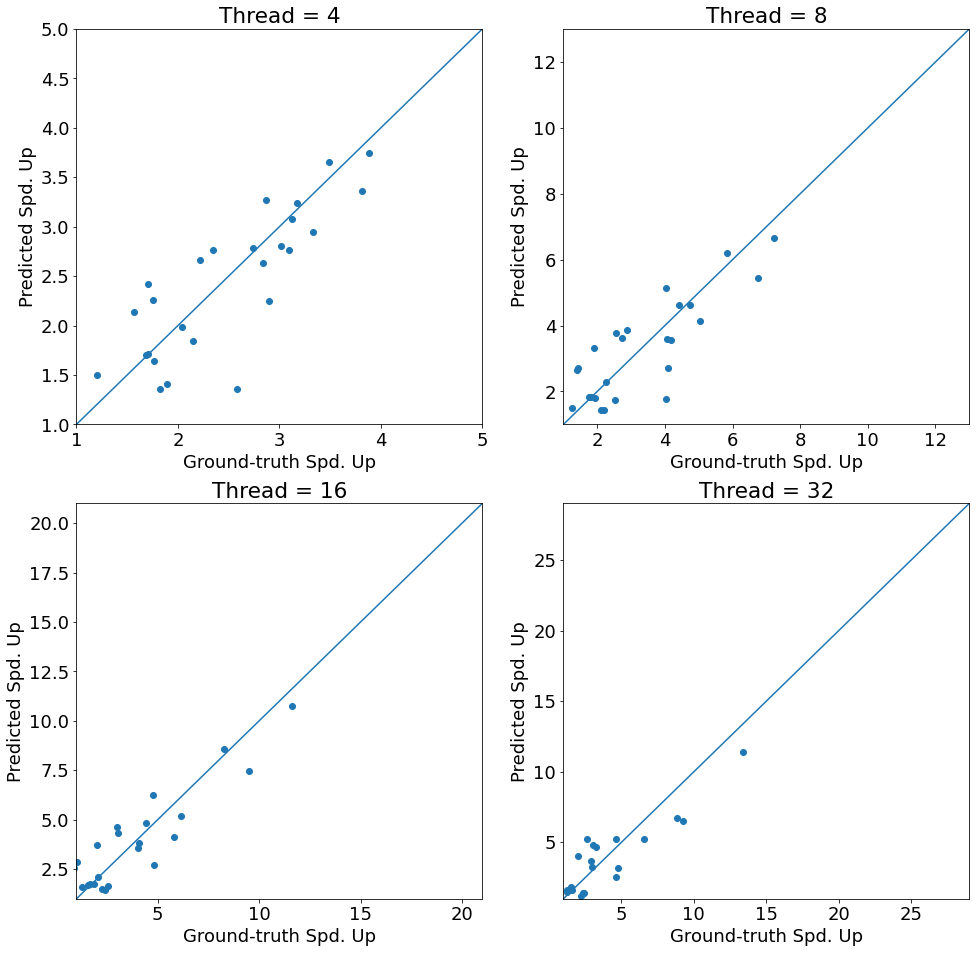

In [12]:
tgts = [4, 8, 16, 32]

data = []

plt.rcParams['figure.figsize'] = [16, 16]
for i, tgt_thread in enumerate(tgts):
    plt.subplot(221 + i)
    df_slct = df_predgt[df_predgt['Thread'] == tgt_thread]
    
    gt = []
    pred = []
    for _, r in df_slct.iterrows():
        gt.append(r['SpeedupGt'])
        pred.append(r['SpeedupPred'])
    
    plt.scatter(pred, gt)
    plt.xlim(1, 5 + i * 8)
    plt.ylim(1, 5 + i * 8)
    plt.plot([1, 5 + i * 8], [1, 5 + i * 8])
    plt.xlabel("Ground-truth Spd. Up")
    plt.ylabel("Predicted Spd. Up")
    plt.title("Thread = {}".format(tgt_thread))
plt.show()